# Exploratory Data Analysis on the Power-LCL dataset
#### What will we look into?
- Skewness and Kurtosis of the distribution of power consumed
- Quarterly, Yearly, Monthly consumption patterns
- If there is a difference in the consumption based on DayOfWeek

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [21]:
df = pd.read_csv("processed_2.csv")

#### Data is sampled on a half hour basis. The problem statement requires us to resample the data to hourly which is done below.

In [22]:
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.set_index("DateTime")
df = df.resample("H").mean()

In [23]:
#helper functions for plotting

def plot(x, y, title, xlabel, ylabel):
    fig, ax1 = plt.subplots(figsize = (20,5))
    ax1.plot(x, y)
    ax1.set_ylabel(ylabel)
    ax1.set_xlabel(xlabel)
    plt.title(title)
    
def box_plot(x, y, title, xlabel):
    plt.figure(figsize=(8, 4))
    sns.boxplot(x, y)
    plt.xlabel(xlabel)
    plt.title(title)
    sns.despine(left=True)
    plt.tight_layout()
    
def factor_plot(x, y, df, title, xlabel):
    plt1 = sns.factorplot(x, y,hue='Day', data = df,
                    size=4, aspect=1.5, legend=False)                                                                                                                                                                                                                                                                                                                                             
    plt.title(title)                                                             
    plt.tight_layout()                                                                                                                  
    sns.despine(left=True, bottom=True) 
    plt.legend(loc='upper right');

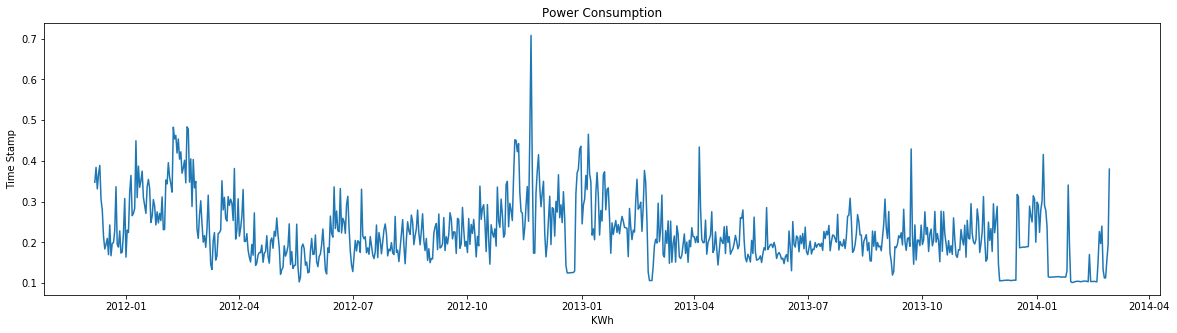

In [24]:
df_d = df.resample("D").mean()
plot(df_d.index, df_d.KWh_18, 'Power Consumption', 'KWh', 'Time Stamp')

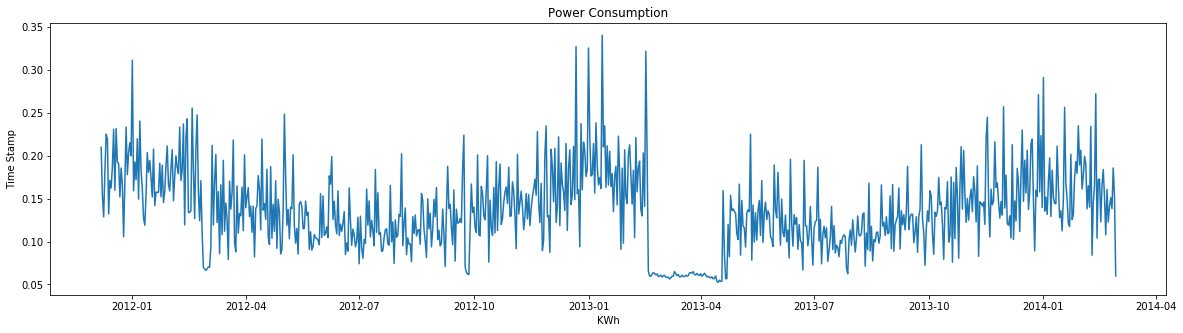

In [25]:
plot(df_d.index, df_d.KWh_20, 'Power Consumption', 'KWh', 'Time Stamp')

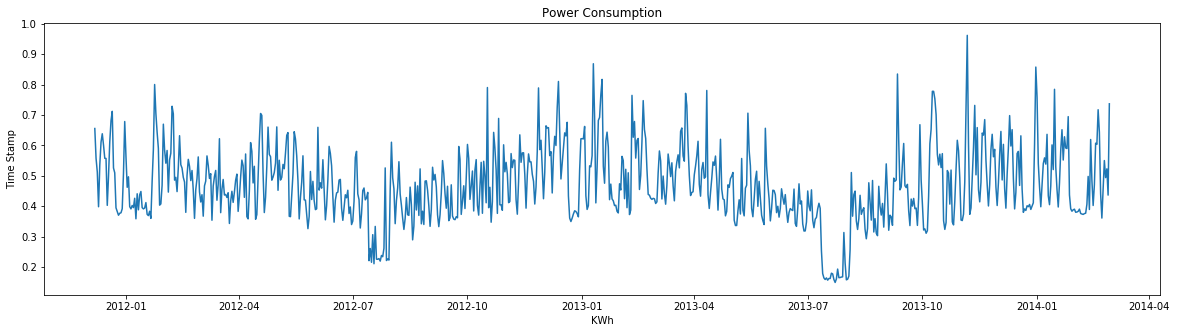

In [26]:
plot(df_d.index, df_d.KWh_21, 'Power Consumption', 'KWh', 'Time Stamp')

Text(0.5, 1.0, 'Energy Consumption Distribution')

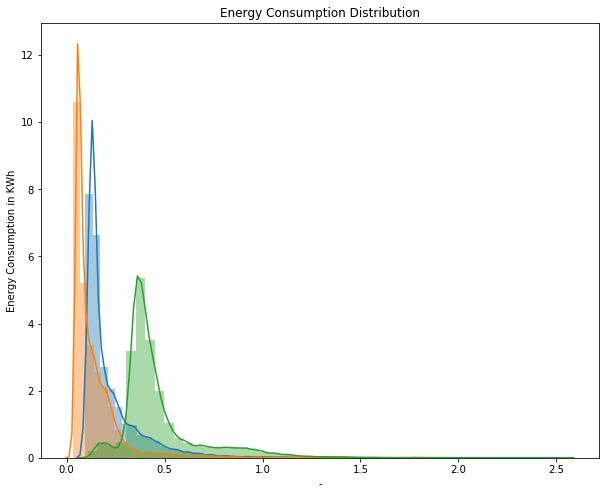

In [27]:
fig, ax1 = plt.subplots(figsize = (10, 8))
sns.distplot(df['KWh_18'])
sns.distplot(df['KWh_20'])
sns.distplot(df['KWh_21'])
ax1.set_ylabel("Energy Consumption in KWh")
ax1.set_xlabel("-")
plt.title("Energy Consumption Distribution")

## Dataset is highly skewed

In [28]:
print("Skewness:",df.skew(axis = 0))
print("Kurtosis:",df.kurt(axis = 0))

Skewness: Unnamed: 0    0.000000
KWh_18        3.123939
KWh_20        3.255295
KWh_21        2.370410
dtype: float64
Kurtosis: Unnamed: 0    -1.200000
KWh_18        14.905774
KWh_20        15.067089
KWh_21         8.309269
dtype: float64


### Data exhibits high skewness and kurtosis
#### Log transformation of the data may help with skewness

Text(0.5, 1.0, 'Energy Consumption Distribution')

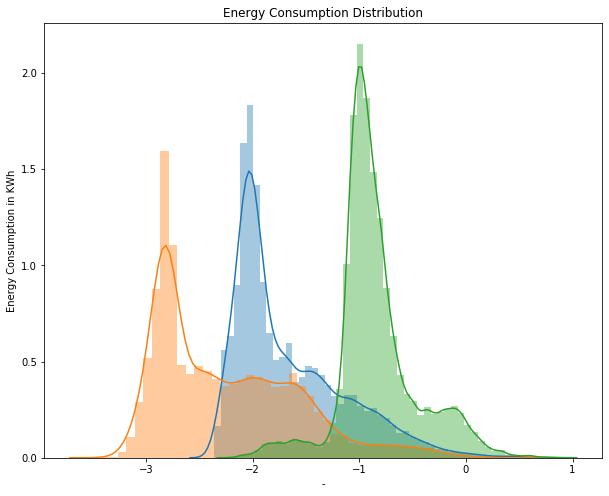

In [29]:
df2 = np.log(df['KWh_18'])
df3 = np.log(df['KWh_20'])
df4 = np.log(df['KWh_21'])
fig, ax1 = plt.subplots(figsize = (10, 8))
sns.distplot(df2)
sns.distplot(df3)
sns.distplot(df4)
ax1.set_ylabel("Energy Consumption in KWh")
ax1.set_xlabel("-")
plt.title("Energy Consumption Distribution")

In [30]:
#Adding additional features that might be key in prediction

df = df.reset_index()
df['year'] = df['DateTime'].apply(lambda x: str(x.year))
df['quarter'] = df['DateTime'].apply(lambda x: str(x.quarter))
df['month'] = df['DateTime'].apply(lambda x: str(x.month))
df['day'] = df['DateTime'].apply(lambda x: str(x.dayofweek))

In [31]:
df["weekday"] = df.apply(lambda row: row["DateTime"].weekday(),axis=1)
df["weekday"] = (df["weekday"] < 5).astype(int)

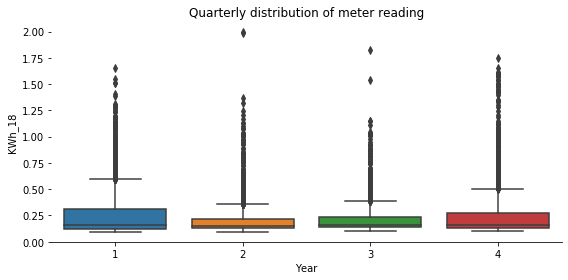

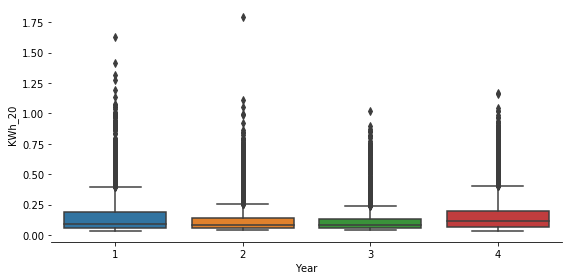

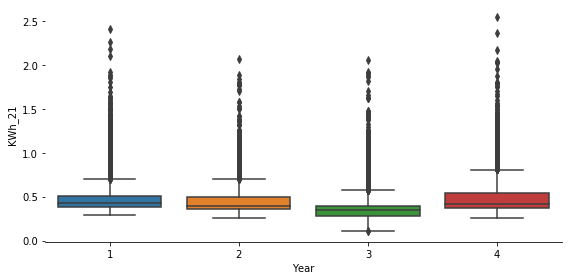

In [32]:
box_plot(df['quarter'], df['KWh_18'], 'Quarterly distribution of meter reading', "Year")
box_plot(df['quarter'], df['KWh_20'], '', "Year")
box_plot(df['quarter'], df['KWh_21'], '', "Year")

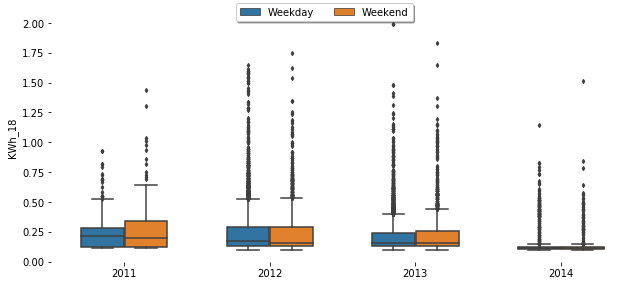

In [33]:
dic={0:'Weekend',1:'Weekday'}
df['Day'] = df.weekday.map(dic)
a=plt.figure(figsize=(9,4)) 
plt1=sns.boxplot('year','KWh_18',hue='Day',width=0.6,fliersize=3,
                    data=df)                                                                                                                                                                                                                                                                                                                                                 
a.legend(loc='upper center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
sns.despine(left=True, bottom=True) 
plt.xlabel('')
plt.tight_layout()                                                                                                                  
plt.legend().set_visible(False);

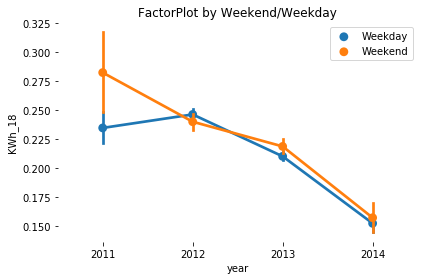

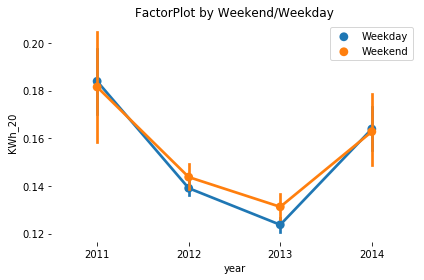

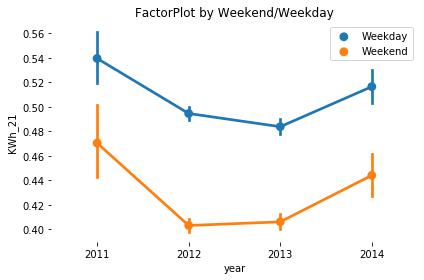

In [34]:
factor_plot('year', 'KWh_18', df, 'FactorPlot by Weekend/Weekday', 'YEAR')
factor_plot('year', 'KWh_20', df, 'FactorPlot by Weekend/Weekday', 'YEAR')
factor_plot('year', 'KWh_21', df, 'FactorPlot by Weekend/Weekday', 'YEAR')

In [35]:
df["KWh"] = df['KWh_18'] + df['KWh_20'] + df['KWh_21']

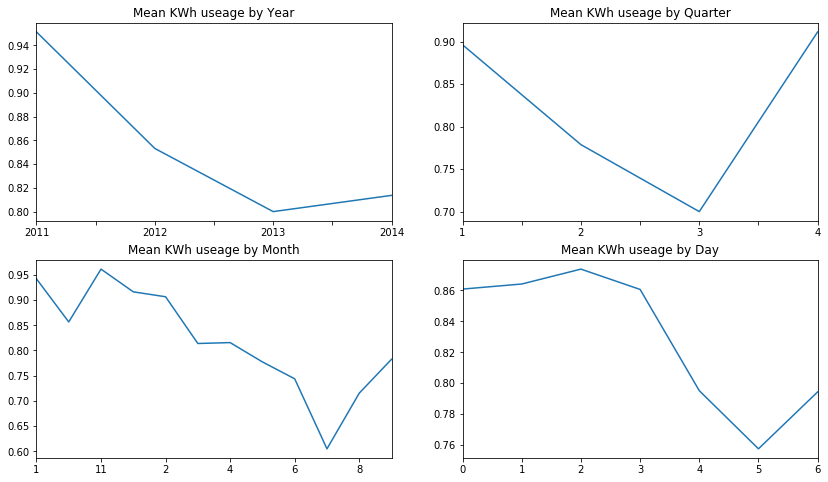

In [36]:
plt.figure(figsize=(14,8))
plt.subplot(2,2,1)
df.groupby('year').KWh.agg('mean').plot()
plt.xlabel('')
plt.title('Mean KWh useage by Year')

plt.subplot(2,2,2)
df.groupby('quarter').KWh.agg('mean').plot()
plt.xlabel('')
plt.title('Mean KWh useage by Quarter')

plt.subplot(2,2,3)
df.groupby('month').KWh.agg('mean').plot()
plt.xlabel('')
plt.title('Mean KWh useage by Month')

plt.subplot(2,2,4)
df.groupby('day').KWh.agg('mean').plot()
plt.xlabel('')
plt.title('Mean KWh useage by Day');

#### The factor plots and box plots suggest one thing clearly that the energy consumption of the households have reduced over the years. Weekend energy consumption is higher for MAC000018, MAC000020 and lower for MAC000021